## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Desktop/Datasets/summer-products-Wish.csv')
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [3]:
product_cat = pd.read_csv('Desktop/Datasets/summer-product-categories.csv')
product_cat.head()

,count,keyword
0,1321,Summer
1,1315,Women's Fashion
2,1082,Fashion
3,961,Women
4,905,Casual


In [4]:
product_cat_results = product_cat.groupby('keyword')['count'].mean().sort_values(ascending=False)
product_cat_results.head(60)

keyword
Summer              1321
Women's Fashion     1315
Fashion             1082
Women                961
Casual               905
Plus Size            636
sleeveless           580
Dress                549
Shorts               540
Tops                 507
sexy                 328
Beach                324
Sleeve               300
short sleeves        296
Print                296
Shirt                281
Tank                 265
Necks                254
V-neck               241
printed              235
T Shirts             235
tank top             219
Cotton               216
summer dress         212
Ladies               212
Loose                204
blouse               201
pants                197
Vest                 189
beach dress          185
Floral               174
women dress          174
Lace                 173
Mini dress           170
Mini                 164
slim                 162
Sleeveless dress     151
Women Fashion        142
Round neck           139
casual dress     

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

## Look for any null values

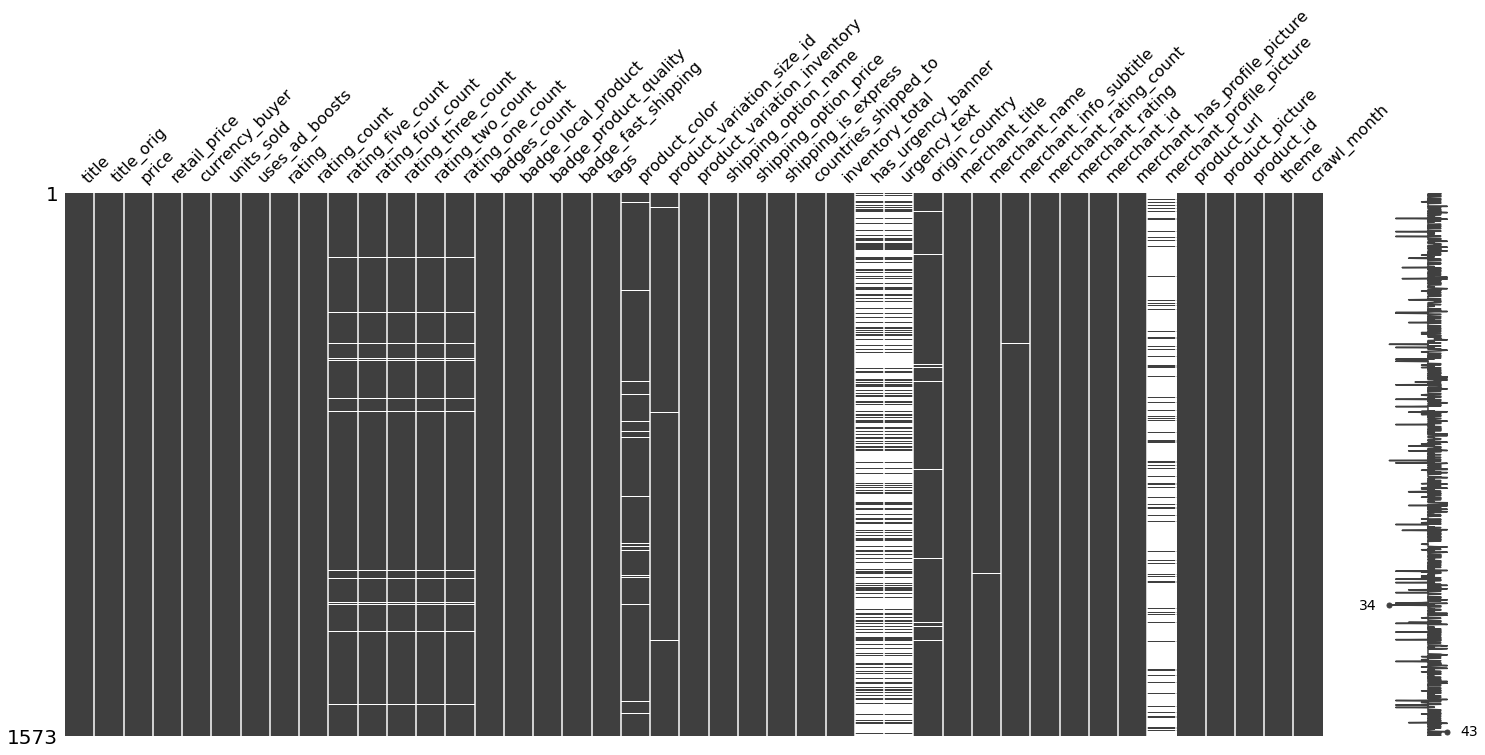

In [4]:
import missingno as msno
msno.matrix(df)

In [5]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


## Features:
1. Title:  for localized for european countries. May be the same as title_orig if the seller did not offer a translation
2. Title_orig: Original english title of the product
3. price: price for buyer
4. retail_price: retail price, or reference price in other stores/places. Used by the seller to indicate a regular value or the price before discount.
5. currency_buyer
6. units_sold: Number of units sold. Lower bound approximation by steps
7. uses_ad_boosts: Whether the seller paid to boost his product within the platform (highlighting, better placement or whatever)
8. rating: Mean product rating
9. rating_count: Total number of ratings of the product
10. rating_five_count: Number of 5-star ratings
11. rating_four_count: Number of 4-star ratings
12. rating_three_count: Number of 3-star ratings
13. rating_two_count: Number of 2-star ratings
14. rating_one_count: Number of 1-star ratings
15. badges_count: number of badges the product or seller have
16. badges_local_product: A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else). Some people may prefer buying local products rather than. 1 means Yes, has the badge
17. badge_product_quality: Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge
18. badge_fast_shipping: Badge awarded when this product's order is consistently shipped rapidly
19. tags: tags set by the seller
20. product_color: Product's main color
21. product_variation_size_id: One of the available size variation for this product
22. product_variation_inventory: Inventory the seller has. Max allowed quantity is 50
23. shipping_option_name
24. shipping_option_price: shipping price
25. shipping_is_express: whether the shipping is express or not. 1 for True
26. countries_shipped_to: Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to
27. inventory_total: Total inventory for all the product's variations (size/color variations for instance)
28. has_urgency_banner: whether there was an urgency banner with an urgency
29. urgency_text: A text banner that appear over some products in the search results.
30. origin_country
31. merchant_title: Merchant's displayed name (show in the UI as the seller's shop name)
32. merchant_name: Merchant's canonical name. A name not shown publicly. Used by the website under the hood as a canonical name. Easier to process since all lowercase without white space
33. merchant_info_subtitle: The subtitle text as shown on a seller's info section to the user. (raw, not preprocessed). The website shows this to the user to give an overview of the seller's stats to the user. Mostly consists of "% <positive_feedbacks> (<rating_count> reviews)" written in french
34. merchant_rating_count: Number of ratings of this seller
35. merchant_rating: merchant's rating
36. merchant_id: merchant unique id
37. merchant_has_profile_picture: Convenience boolean that says whether there is a "merchant_profile_picture" url
38. merchant_profile_picture: Custom profile picture of the seller (if the seller has one). Empty otherwise.
39. product_url: url to the product page. You may need to login to access it
40. product_picture
41. product_id: product identifier. You can use this key to remove duplicate entries if you're not interested in studying them.
42. theme: the search term used in the search bar of the website to get these search results.
43. crawl_month: meta for info only.

## Remove duplicate values

In [4]:
## Duplicate values

duplicate_series = df['product_id'].duplicated(keep='first') 
df[duplicate_series]

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
62,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
91,Femmes été imprimé grande taille pantalon déco...,Women Summer Printed Plus Size Loose Casual Tr...,11.00,10,EUR,100,1,3.46,50,20.0,...,225438,4.301120,53f6b7c81c105e2dfac91041,0,NaN,https://www.wish.com/c/5d5d038d99df1e17cc9313cf,https://contestimg.wish.com/api/webimage/5d5d0...,5d5d038d99df1e17cc9313cf,summer,2020-08
98,Mode féminine sans manches col profond croix s...,Women Fashion Sleeveless Deep Neck Cross Spagh...,5.79,42,EUR,1000,0,3.32,121,36.0,...,5083,3.947472,566eaa533a698c6442549a74,0,NaN,https://www.wish.com/c/5d1db3c0e2b5cc0f74e091af,https://contestimg.wish.com/api/webimage/5d1db...,5d1db3c0e2b5cc0f74e091af,summer,2020-08
140,2018 New Fashion Women Casual Playsuit Dames J...,2018 New Fashion Women Casual Playsuit Ladies ...,11.00,10,EUR,5000,0,3.72,1008,447.0,...,61895,4.268002,55e7e41e606d0a18fdfc67d1,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5aec22cec25735338c544690,https://contestimg.wish.com/api/webimage/5aec2...,5aec22cec25735338c544690,summer,2020-08
162,Costume de sport cool pour hommes d'été Vêteme...,Summer mens cool sport suit Sports Wear Casual...,16.00,14,EUR,10,0,3.00,3,0.0,...,31,3.548387,5e61c817039ce2184a0ed392,0,NaN,https://www.wish.com/c/5e9a74e447f7d92c8db8d14b,https://contestimg.wish.com/api/webimage/5e9a7...,5e9a74e447f7d92c8db8d14b,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,Tendances vêtements de sport d'été pour hommes...,Trending Summer Sports Wear for Men Casual Two...,16.00,14,EUR,100,1,4.05,82,43.0,...,514,4.217899,5b0b907d59206904541886cf,0,NaN,https://www.wish.com/c/5ea0f2a654446407c111b622,https://contestimg.wish.com/api/webimage/5ea0f...,5ea0f2a654446407c111b622,summer,2020-08
1562,Summer Women s Fashion Lace Up Tie Pants Plus...,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,EUR,100,0,3.77,47,22.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/5d58daef3159a812b05933d2,https://contestimg.wish.com/api/webimage/5d58d...,5d58daef3159a812b05933d2,summer,2020-08
1566,Robe mi-longue d'été à manches courtes pour fe...,Womens Short Sleeve Baggy Summer Beach Midi Dr...,11.00,134,EUR,100,1,3.54,28,7.0,...,1926,4.071651,593402ae25c4f54ed4e0abdf,0,NaN,https://www.wish.com/c/5d1060d39ed281190dfcec91,https://contestimg.wish.com/api/webimage/5d106...,5d1060d39ed281190dfcec91,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08


In [5]:
df.drop_duplicates(subset ="product_id", keep = 'first', inplace = True)

In [6]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 35
rating_four_count                 35
rating_three_count                35
rating_two_count                  35
rating_one_count                  35
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     40
product_variation_size_id         13
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

## Target Feature: Units sold

100       396
1000      362
5000      200
10000     163
20000      99
50         50
10         36
50000      17
100000      6
1           3
8           2
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64


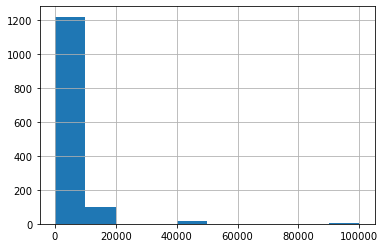

In [7]:
print(df['units_sold'].value_counts())
df['units_sold'].hist();

#### Units sold below 10 are very few, will combine with the "10" units sold.

## Separate Categorical and Numeric features

In [7]:
df_num = df[['price', 'retail_price', 'units_sold', 'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
             'rating_three_count', 'rating_two_count', 'rating_one_count', 'badges_count', 'product_variation_inventory', 
             'inventory_total', 'shipping_option_price', 'countries_shipped_to', 'merchant_rating_count']]

df_cat = df[['title', 'title_orig','currency_buyer','uses_ad_boosts','badge_local_product', 
             'badge_product_quality', 'badge_fast_shipping','tags', 'product_color', 'product_variation_size_id',
             'shipping_option_name', 'shipping_is_express', 'countries_shipped_to','has_urgency_banner', 
             'urgency_text', 'origin_country', 'merchant_title', 'merchant_name', 'merchant_info_subtitle',
             'merchant_rating','merchant_id', 'merchant_has_profile_picture','product_url', 'product_picture',
             'product_id', 'theme', 'crawl_month']]

In [8]:
df_cat.head()

,title,title_orig,currency_buyer,uses_ad_boosts,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,...,merchant_name,merchant_info_subtitle,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,EUR,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,...,zgrdejia,(568 notes),4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,EUR,1,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,...,sarahouse,"83 % avis positifs (17,752 notes)",3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,EUR,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,...,hxt520,86 % avis positifs (295 notes),3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,EUR,1,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,...,allenfan,"(23,832 notes)",4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,EUR,1,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,...,happyhorses,"85 % avis positifs (14,482 notes)",4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [30]:
df_num.head()

,price,retail_price,units_sold,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,product_variation_inventory,inventory_total,shipping_option_price,countries_shipped_to,merchant_rating_count
0,16.00,14,100,54,26.0,8.0,10.0,1.0,9.0,0,50,50,4,34,568
1,8.00,22,20000,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,50,50,2,41,17752
2,8.00,43,100,14,5.0,4.0,2.0,0.0,3.0,0,1,50,3,36,295
3,8.00,8,5000,579,295.0,119.0,87.0,42.0,36.0,0,50,50,2,41,23832
4,2.72,3,100,20,6.0,4.0,2.0,2.0,6.0,0,1,50,1,35,14482


## Visualize correlation with numerical features

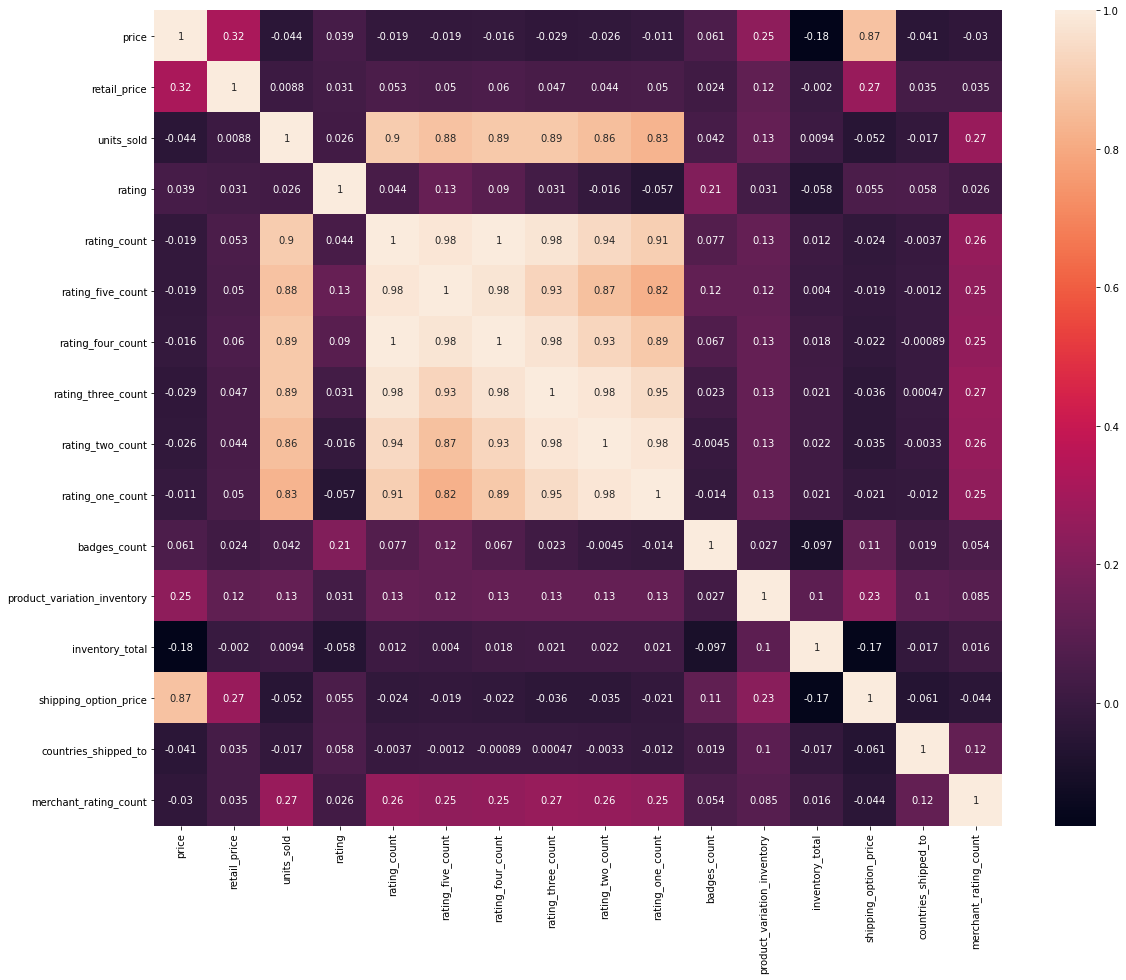

In [9]:
corr_matrix = df_num.corr()
fig = plt.figure(figsize=(19, 15))
sns.heatmap(corr_matrix, annot=True);

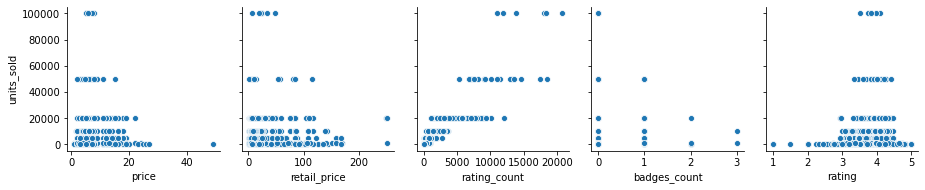

In [10]:
sns.pairplot(data=df_num,
                  x_vars=['price', 'retail_price', 'rating_count', 'badges_count', 'rating'],
                  y_vars=['units_sold']);

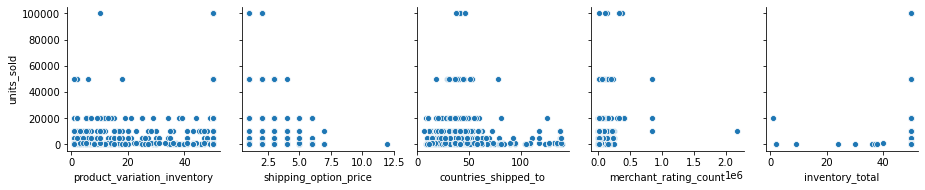

In [11]:
sns.pairplot(data=df_num,
                  x_vars=['product_variation_inventory', 'shipping_option_price',
                          'countries_shipped_to', 'merchant_rating_count', 'inventory_total' ],
                  y_vars=['units_sold']);

## Distribution of numerical features

In [68]:
df_num.columns

Index(['price', 'retail_price', 'units_sold', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'product_variation_inventory', 'inventory_total',
       'shipping_option_price', 'countries_shipped_to',
       'merchant_rating_count'],
      dtype='object')

In [95]:
def hist_num(x):
    print(df_num[x].value_counts())
    df_num[x].hist()

8.00     241
11.00    171
9.00     111
7.00     105
6.00     103
        ... 
5.82       1
4.84       1
5.72       1
5.70       1
5.91       1
Name: price, Length: 127, dtype: int64


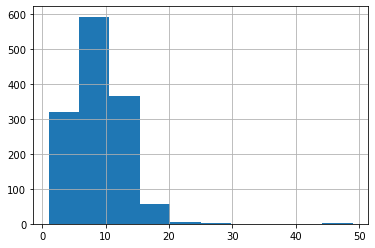

In [96]:
hist_num('price')

7      147
6      112
10     101
5       89
11      84
      ... 
64       1
250      1
53       1
46       1
1        1
Name: retail_price, Length: 104, dtype: int64


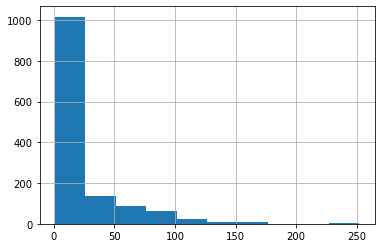

In [97]:
hist_num('retail_price')

0        35
2        21
4        20
6        20
10       17
         ..
13198     1
908       1
907       1
904       1
602       1
Name: rating_count, Length: 761, dtype: int64


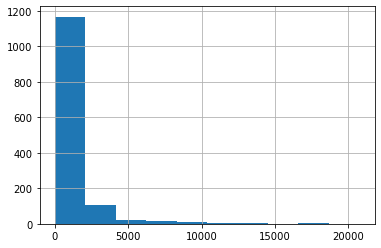

In [99]:
hist_num('rating_count')

1.0      36
5.0      34
2.0      31
3.0      29
4.0      26
         ..
412.0     1
121.0     1
115.0     1
150.0     1
343.0     1
Name: rating_five_count, Length: 605, dtype: int64


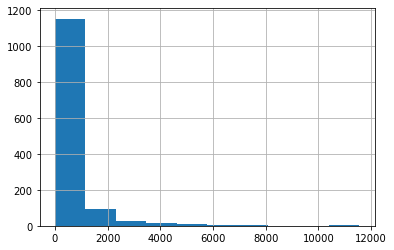

In [100]:
hist_num('rating_five_count')

1.0      67
0.0      65
2.0      50
4.0      42
3.0      41
         ..
202.0     1
245.0     1
460.0     1
612.0     1
581.0     1
Name: rating_four_count, Length: 440, dtype: int64


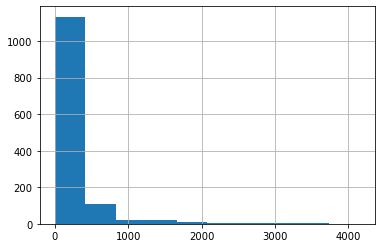

In [101]:
hist_num('rating_four_count')

0.0      99
1.0      67
2.0      61
4.0      41
3.0      38
         ..
207.0     1
982.0     1
255.0     1
568.0     1
390.0     1
Name: rating_three_count, Length: 384, dtype: int64


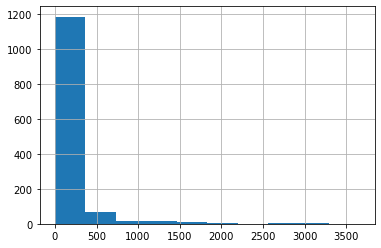

In [103]:
hist_num('rating_three_count')

0.0       149
1.0       117
2.0        63
3.0        56
4.0        45
         ... 
1310.0      1
1736.0      1
135.0       1
157.0       1
263.0       1
Name: rating_two_count, Length: 262, dtype: int64


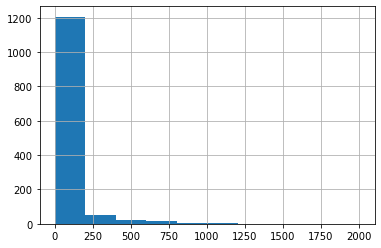

In [104]:
hist_num('rating_two_count')

0.0      88
1.0      84
2.0      60
3.0      52
4.0      46
         ..
343.0     1
847.0     1
681.0     1
559.0     1
169.0     1
Name: rating_one_count, Length: 330, dtype: int64


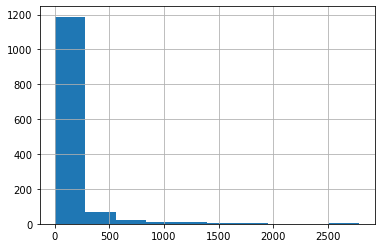

In [105]:
hist_num('rating_one_count')

0    1204
1     125
2      10
3       2
Name: badges_count, dtype: int64


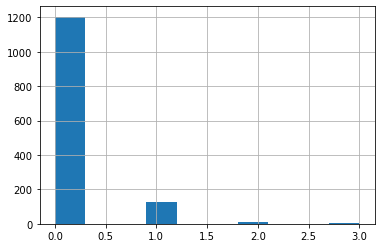

In [106]:
hist_num('badges_count')

50    793
1     118
2      64
5      53
3      42
10     33
4      25
9      19
6      17
20     14
7      14
15     13
17     10
18      8
49      8
19      6
13      6
11      6
25      6
30      6
29      5
14      5
8       5
12      5
34      4
47      4
35      4
41      4
43      4
44      4
48      4
27      3
36      3
46      3
23      2
21      2
26      2
28      2
31      2
37      2
38      2
39      2
45      2
16      1
22      1
33      1
40      1
24      1
Name: product_variation_inventory, dtype: int64


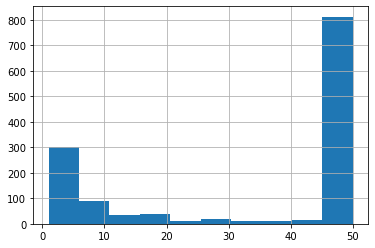

In [107]:
hist_num('product_variation_inventory')

50    1331
2        2
40       1
38       1
37       1
36       1
30       1
24       1
9        1
1        1
Name: inventory_total, dtype: int64


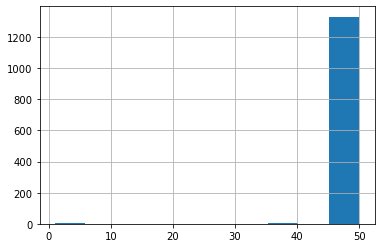

In [108]:
hist_num('inventory_total')

2     522
3     456
1     247
4      70
5      29
6      11
7       5
12      1
Name: shipping_option_price, dtype: int64


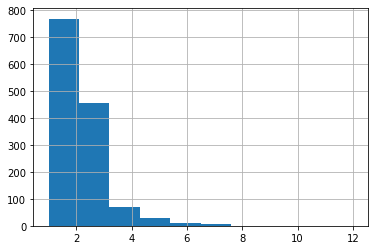

In [109]:
hist_num('shipping_option_price')

43    146
41    145
40     89
38     65
36     58
     ... 
67      1
66      1
65      1
64      1
6       1
Name: countries_shipped_to, Length: 94, dtype: int64


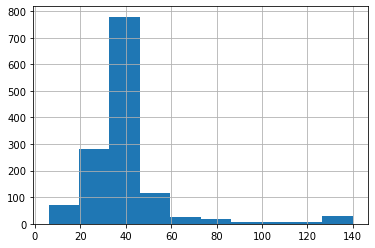

In [110]:
hist_num('countries_shipped_to')

32168    11
12309    10
88193     7
80093     7
42919     7
         ..
1172      1
15502     1
9357      1
87178     1
0         1
Name: merchant_rating_count, Length: 917, dtype: int64


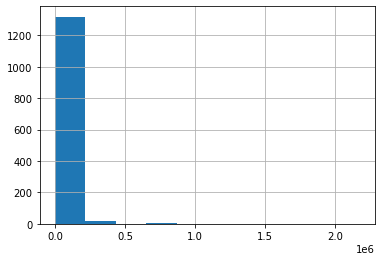

In [111]:
hist_num('merchant_rating_count')

## Distribution in categorical features

graph for currency_buyer: total = 1


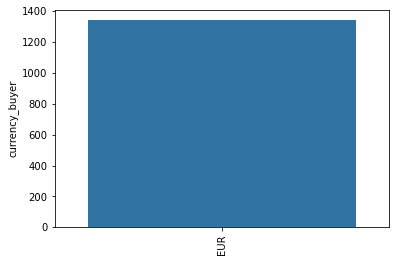

graph for uses_ad_boosts: total = 2


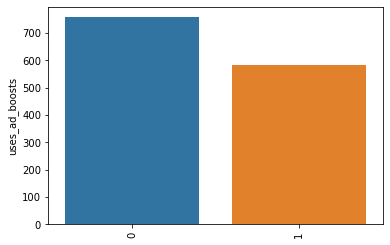

graph for rating: total = 192


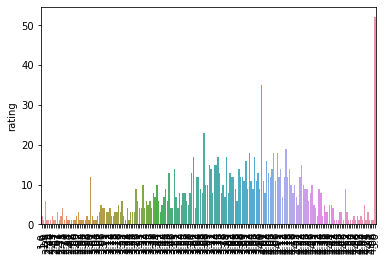

graph for badge_local_product: total = 2


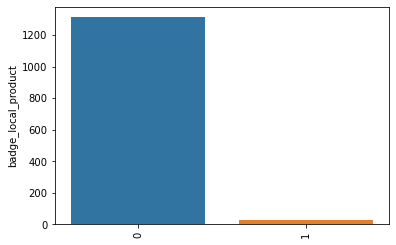

graph for badge_product_quality: total = 2


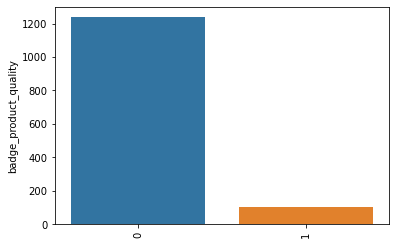

graph for badge_fast_shipping: total = 2


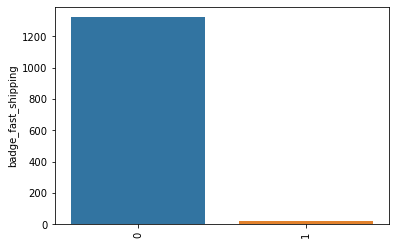

In [116]:
for i in df_cat.columns[2:8]:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for product_color: total = 101


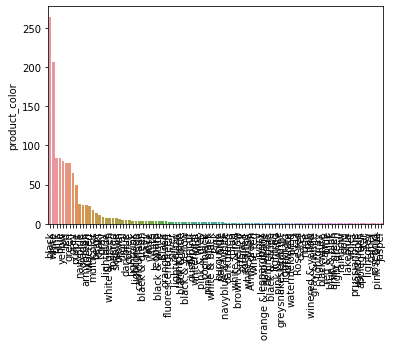

graph for product_variation_size_id: total = 106


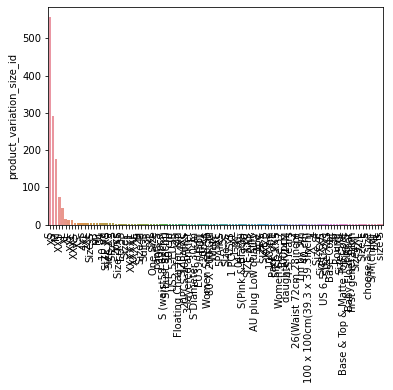

graph for shipping_option_name: total = 15


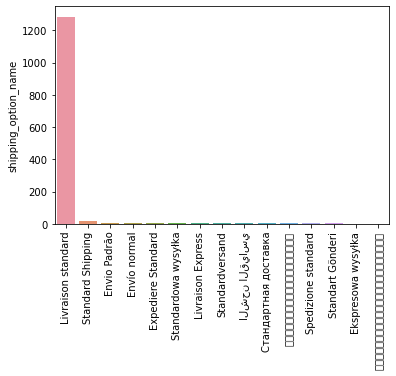

graph for shipping_is_express: total = 2


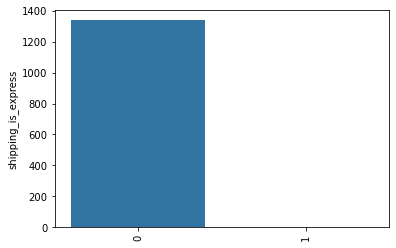

graph for countries_shipped_to: total = 94


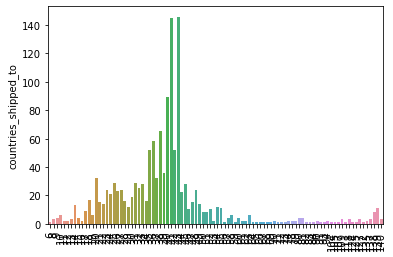

graph for origin_country: total = 6


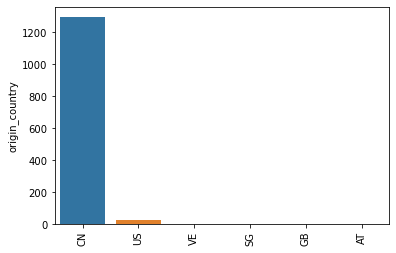

graph for merchant_has_profile_picture: total = 2


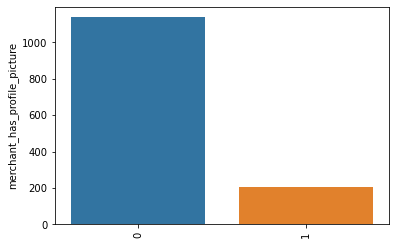

graph for theme: total = 1


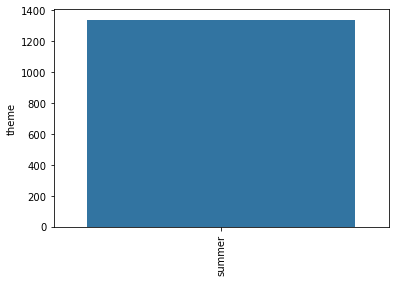

In [119]:
for i in df_cat[['product_color', 'product_variation_size_id','shipping_option_name', 'shipping_is_express', 
                'countries_shipped_to', 'origin_country','merchant_has_profile_picture','theme']]:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [114]:
df_cat.columns

Index(['title', 'title_orig', 'currency_buyer', 'uses_ad_boosts', 'rating',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'shipping_option_name', 'shipping_is_express', 'countries_shipped_to',
       'has_urgency_banner', 'urgency_text', 'origin_country',
       'merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_rating', 'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

## Correlation of categories with units sold

In [53]:
df.groupby('uses_ad_boosts')['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
uses_ad_boosts,,,,,,,,
0,757.0,5027.158520,10125.796202,1.0,100.0,1000.0,5000.0,100000.0
1,584.0,4552.996575,9714.160788,10.0,100.0,1000.0,5000.0,100000.0


### Not a significant difference in units sold for items that used an ad boost vs items with no ad boost

In [37]:
rating_results = df.groupby('rating')['units_sold'].mean().sort_values(ascending=False)
rating_results.head(15)

rating
2.93    20000.000000
4.48    20000.000000
2.97    20000.000000
4.41    16500.000000
3.53    15912.500000
3.35    14400.000000
3.83    13958.333333
3.98    13923.076923
3.82    13084.615385
3.76    12776.923077
4.12    12571.428571
4.10    12016.666667
3.45    11888.888889
4.01    11372.727273
4.32    10500.000000
Name: units_sold, dtype: float64

In [38]:
df.groupby('badge_local_product')['units_sold'].mean().sort_values(ascending=False)

badge_local_product
0    4839.077685
1    3957.142857
Name: units_sold, dtype: float64

In [39]:
df.groupby('badge_product_quality')['units_sold'].mean().sort_values(ascending=False)

badge_product_quality
1    6999.038462
0    4637.517381
Name: units_sold, dtype: float64

In [40]:
df.groupby('badge_fast_shipping')['units_sold'].mean().sort_values(ascending=False)

badge_fast_shipping
0    4825.498487
1    4484.210526
Name: units_sold, dtype: float64

In [10]:
color_results = df.groupby('product_color')['units_sold'].mean().sort_values(ascending=False)
color_results.head(30)

product_color
light green       100000.000000
wine red           50000.000000
rosegold           20000.000000
denimblue          20000.000000
ivory              20000.000000
floral             12200.000000
coolblack          10050.000000
black & yellow     10050.000000
black & white      10033.333333
army green         10000.000000
navy blue          10000.000000
whitestripe        10000.000000
Blue               10000.000000
White               8666.666667
orange              7610.750000
burgundy            7500.000000
gray                7483.333333
lightgreen          7333.333333
purple              6884.081633
camouflage          6700.000000
khaki               6572.727273
grey                6553.384615
rosered             6157.142857
multicolor          5855.555556
navyblue            5540.400000
black               5512.284091
white & black       5500.000000
pink & grey         5500.000000
dustypink           5500.000000
skyblue             5314.285714
Name: units_sold, dtype: f

In [45]:
variation_size_id_results = df.groupby('product_variation_size_id')['units_sold'].mean().sort_values(ascending=False)
variation_size_id_results.head(20)

product_variation_size_id
3 layered anklet    50000.000000
20PCS-10PAIRS       20000.000000
5                   20000.000000
Baby Float Boat     20000.000000
29                  10500.000000
Women Size 36       10000.000000
5XL                 10000.000000
1 PC - XL           10000.000000
S (waist58-62cm)    10000.000000
XXXL                10000.000000
10pcs               10000.000000
US 6.5 (EU 37)      10000.000000
XL                   9166.666667
M                    7391.677966
L                    6705.555556
S                    5786.294964
One Size             5500.000000
XXXXXL               5050.000000
2pcs                 5050.000000
20pcs                5000.000000
Name: units_sold, dtype: float64

In [49]:
df.groupby('shipping_option_name')['units_sold'].mean().sort_values(ascending=False)

shipping_option_name
Standardowa wysyłka        10033.333333
ការដឹកជញ្ជូនតាមស្តង់ដារ    10000.000000
Ekspresowa wysyłka         10000.000000
Standart Gönderi            5500.000000
การส่งสินค้ามาตรฐาน         5000.000000
Livraison standard          4879.812451
Standard Shipping           4352.777778
Envio Padrão                2787.500000
Envío normal                2775.000000
Стандартная доставка        2550.000000
Spedizione standard          550.000000
Expediere Standard           550.000000
الشحن القياسي                400.000000
Livraison Express            400.000000
Standardversand              100.000000
Name: units_sold, dtype: float64

In [54]:
for col in df[['countries_shipped_to','has_urgency_banner', 'urgency_text', 'origin_country','merchant_title', 
               'merchant_name', 'merchant_info_subtitle','merchant_rating', 'merchant_id', 'merchant_has_profile_picture',
               'merchant_profile_picture', 'product_url', 'product_picture','product_id']]:
    result = df.groupby(col)['units_sold'].mean().sort_values(ascending=False)
    print(result.head(20))

countries_shipped_to
53     50000.000000
46     25120.000000
78     25005.000000
125    20000.000000
10     11001.666667
59     10000.000000
72     10000.000000
6      10000.000000
31      9018.965517
18      8964.705882
29      8766.666667
38      8673.338462
50      8275.000000
47      8156.666667
60      8000.000000
37      7178.437500
51      7175.000000
8       6686.666667
45      6608.928571
49      6542.857143
Name: units_sold, dtype: float64
has_urgency_banner
1.0    4715.595628
Name: units_sold, dtype: float64
urgency_text
Réduction sur les achats en gros    10000.000000
Quantité limitée !                   4701.117808
Name: units_sold, dtype: float64
origin_country
SG    10050.000000
CN     4861.938949
US     1600.370370
GB     1000.000000
AT      100.000000
VE       83.333333
Name: units_sold, dtype: float64
merchant_title
fashionstore0408                          100000.000000
bigcompany                                100000.000000
trendy_world                              

## Filling in the null values

In [11]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 35
rating_four_count                 35
rating_three_count                35
rating_two_count                  35
rating_one_count                  35
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     40
product_variation_size_id         13
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [12]:
df.loc[(df['rating_five_count'].isnull()) & (df['rating_four_count'].isnull()) 
       & (df['rating_three_count'].isnull()) & (df['rating_two_count'].isnull()) 
       & (df['rating_one_count'].isnull()), 'rating'] = 0

#### All the rows with missing rating counts are the same

In [13]:
df.loc[df['rating'] == 0, 'rating_five_count'] = 0
df.loc[df['rating'] == 0, 'rating_four_count'] = 0
df.loc[df['rating'] == 0, 'rating_three_count'] = 0
df.loc[df['rating'] == 0, 'rating_two_count'] = 0
df.loc[df['rating'] == 0, 'rating_one_count'] = 0

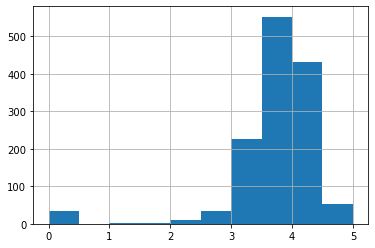

In [14]:
df['rating'].hist()

In [15]:
df.loc[df['has_urgency_banner'].isnull(), 'has_urgency_banner'] = 0

In [16]:
df.groupby('has_urgency_banner')['units_sold'].mean()

has_urgency_banner
0.0    4860.103590
1.0    4715.595628
Name: units_sold, dtype: float64

In [17]:
df['urgency_text'].value_counts()

Quantité limitée !                  365
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [18]:
df.loc[df['urgency_text'].isnull(), 'urgency_text'] = 'No Text'

In [19]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                  0
rating_four_count                  0
rating_three_count                 0
rating_two_count                   0
rating_one_count                   0
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     40
product_variation_size_id         13
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [17]:
df.groupby('urgency_text')['units_sold'].mean()

urgency_text
No Text                              4860.103590
Quantité limitée !                   4701.117808
Réduction sur les achats en gros    10000.000000
Name: units_sold, dtype: float64

#### Probably drop the rows with null countries

## Add new features discount percent, (men's or women's fashion), simplified title, and color

In [13]:
df['discount_percent'] = (df['retail_price']-df['price'])/df['retail_price']

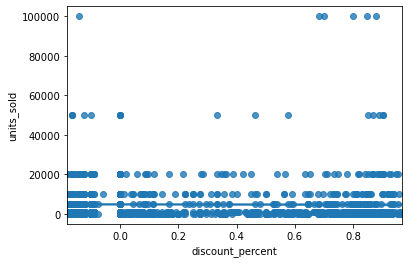

In [19]:
sns.regplot(x="discount_percent", y="units_sold", data=df);

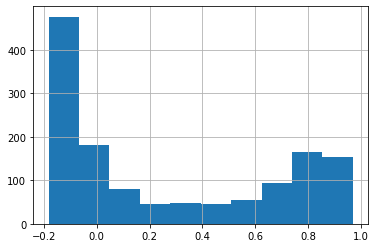

In [41]:
df['discount_percent'].hist()

Based on the graph many product actually sold higher than the retail price.

### Make another column that states 1 if they had a sale and 0 if no sale. The measure for sale is a discount of at least 10%

In [42]:
def sale(x):
    if x > 0.10:
        return 1
    else:
        return 0

In [43]:
df['on_sale'] = df['discount_percent'].apply(lambda x: sale(x))
df['on_sale'].value_counts()

0    696
1    645
Name: on_sale, dtype: int64

In [51]:
df.groupby('on_sale')['units_sold'].describe()

,count,mean,std,min,25%,50%,75%,max
on_sale,,,,,,,,
0,696.0,5054.192529,8598.199584,1.0,100.0,1000.0,5000.0,100000.0
1,645.0,4568.668217,11224.921972,1.0,100.0,1000.0,5000.0,100000.0


In [18]:
product_cat_results.head(60)

keyword
Summer              1321
Women's Fashion     1315
Fashion             1082
Women                961
Casual               905
Plus Size            636
sleeveless           580
Dress                549
Shorts               540
Tops                 507
sexy                 328
Beach                324
Sleeve               300
short sleeves        296
Print                296
Shirt                281
Tank                 265
Necks                254
V-neck               241
printed              235
T Shirts             235
tank top             219
Cotton               216
summer dress         212
Ladies               212
Loose                204
blouse               201
pants                197
Vest                 189
beach dress          185
Floral               174
women dress          174
Lace                 173
Mini dress           170
Mini                 164
slim                 162
Sleeveless dress     151
Women Fashion        142
Round neck           139
casual dress     

In [50]:
product_cat_results.tail(60)

keyword
causalshirtwomen                   1
causaltop                          1
romperswomenjumpsuit               1
chaussurefamme                     1
cheap tankini swimwear             1
cheeky bikini bottom               1
chemisehomme                       1
romperswomen                       1
chestzipper                        1
chiffiondres                       1
chiffomdresse                      1
rompersshort                       1
compressionshort                   1
contrastcolordres                  1
crystalbikini                      1
croppedpant                        1
pushupswimsuittop                  1
crochet bikini                     1
crochet halter top                 1
crochet top                        1
pushupsuit                         1
crop tops fashion                  1
cropped                            1
pushuppaddedbra                    1
croppedjean                        1
pushupbikiniset                    1
controlpantie                 

In [22]:
def title_simplifier(title):
    if 'dress' in title.lower() or 'halter' in title.lower():
        return 'Dress'
    elif 'swimwear' in title.lower() or 'swimming' in title.lower() or 'swimsuit' in title.lower() or 'bikini' in title.lower() or 'tankini' in title.lower() or 'swim' in title.lower() or 'beach' in title.lower():
        return 'Swimwear'
    elif 'pant' in title.lower() or 'legging' in title.lower() or 'jean' in title.lower() or 'trouser' in title.lower():
        return 'Pants'
    elif 'short' in title.lower():
        return 'Shorts'
    elif 'skirt' in title.lower():
        return 'Skirt'
    elif 'top' in title.lower() or 'blouse' in title.lower() or 'shirt' in title.lower() or 'sweatshirt' in title.lower() or 'sweater' in title.lower() or 'vest' in title.lower() or 'tank top' in title.lower():
        return 'Top'
    elif 'sport' in title.lower() or 'yoga' in title.lower() or 'fitness' in title.lower() or 'running' in title.lower() or 'athletic' in title.lower(): 
        return 'Sportswear'
    elif 'romper' in title.lower() or 'jumpsuit' in title.lower() or 'overalls' in title.lower() or 'bodysuit' in title.lower():
        return 'Onepiece'
    elif 'shoe' in title.lower() or 'slipper' in title.lower() or 'sneaker' in title.lower():
        return 'Footwear'
    elif 'pajama' in title.lower() or 'pyjama' in title.lower() or 'sleep' in title.lower() or 'sleepwear' in title.lower():
        return 'Sleepwear'
    else:
        return 'Accessories'

In [23]:
df['title_simple'] = df['title_orig'].apply(lambda x: title_simplifier(x))

In [24]:
df['title_simple'].value_counts()

Dress          503
Top            269
Shorts         192
Pants          162
Swimwear       145
Accessories     28
Footwear        13
Onepiece        12
Sportswear       8
Skirt            6
Sleepwear        3
Name: title_simple, dtype: int64

#### The top items sold

In [22]:
df.groupby('title_simple')['units_sold'].mean().sort_values(ascending=False)

title_simple
Skirt          7518.333333
Top            5913.115242
Swimwear       5516.503448
Dress          5366.825050
Onepiece       3595.916667
Shorts         3351.760417
Pants          3239.512346
Footwear       2838.461538
Accessories    2412.857143
Sportswear     1526.875000
Sleepwear       400.000000
Name: units_sold, dtype: float64

### Comparing the item sold and if it had a discount

In [52]:
df.groupby(['title_simple', 'on_sale'])['units_sold'].describe()

count         mean           std    min      25%  \
title_simple on_sale                                                     
Accessories  0          9.0  3701.111111   6889.721410   10.0   100.00   
             1         19.0  1802.631579   4662.988839   50.0   100.00   
Dress        0        288.0  5235.208333   9084.853073   10.0   100.00   
             1        215.0  5543.130233  13837.946055    1.0   100.00   
Footwear     0         11.0  2890.909091   6396.476303  100.0   100.00   
             1          2.0  2550.000000   3464.823228  100.0  1325.00   
Onepiece     0         10.0  4215.000000   3717.081442   50.0  1000.00   
             1          2.0   500.500000    706.399674    1.0   250.75   
Pants        0         73.0  3373.438356   5505.768815    1.0   100.00   
             1         89.0  3129.662921   5193.526445   10.0   100.00   
Shorts       0         94.0  2951.617021   4814.179837    2.0   100.00   
             1         98.0  3735.571429  10771.697085    6.0   100.00   
Skirt        0          3.0  6670.000000   5767.729189   10.0  5005.00   
             1          3.0  8366.666667  10368.381423  100.0  2550.00   
Sleepwear    0          3.0   400.000000    519.615242  100.0   100.00   
Sportswear   0          1.0     2.000000           NaN    2.0     2.00   
             1          7.0  1744.714286   3667.694858    3.0    55.00   
Swimwear     0         71.0  6371.450704  10881.737939    3.0   550.00   
             1         74.0  4696.216216   7872.373352   10.0  1000.00   
Top          0        133.0  6807.669173   9827.849798   10.0  1000.00   
             1        136.0  5038.294118  12334.568595    8.0   100.00   

                          50%       75%       max  
title_simple on_sale                               
Accessories  0         1000.0   1000.00   20000.0  
             1          100.0   1000.00   20000.0  
Dress        0         1000.0   5000.00  100000.0  
             1         1000.0   5000.00  100000.0  
Footwear     0          100.0    550.00   20000.0  
             1         2550.0   3775.00    5000.0  
Onepiece     0         5000.0   5000.00   10000.0  
             1          500.5    750.25    1000.0  
Pants        0         1000.0   5000.00   20000.0  
             1         1000.0   5000.00   20000.0  
Shorts       0         1000.0   5000.00   20000.0  
             1         1000.0   5000.00  100000.0  
Skirt        0        10000.0  10000.00   10000.0  
             1         5000.0  12500.00   20000.0  
Sleepwear    0          100.0    550.00    1000.0  
Sportswear   0            2.0      2.00       2.0  
             1          100.0   1000.00   10000.0  
Swimwear     0         1000.0   7500.00   50000.0  
             1         1000.0   5000.00   50000.0  
Top          0         5000.0  10000.00   50000.0  
             1         1000.0   5000.00  100000.0

### Not a signifant difference in units sold for items that were on sale vs items not on sale

In [25]:
def fashion_category(title):
    if "women's fashion" in title.lower() or 'women fashion' in title.lower() or 'women' in title.lower():
            return "Women's Fashion"
    else:
        return "Men's Fashion"

In [26]:
df['product_category'] = df['title_orig'].apply(lambda x: fashion_category(x))

In [27]:
df['product_category'].value_counts()

Women's Fashion    1149
Men's Fashion       192
Name: product_category, dtype: int64

In [28]:
color_results.tail(60)

product_color
watermelonred          5000.000000
white                  4908.791262
brown                  4216.666667
black & green          4000.000000
leopard                4000.000000
lightpink              3787.500000
green                  3750.298701
blue                   3602.119048
red                    3518.589744
navy                   3400.000000
winered                3130.434783
lightyellow            3000.000000
Pink                   3000.000000
pink                   2938.095238
beige                  2835.714286
armygreen              2800.041667
yellow                 2715.775000
Black                  2333.333333
darkblue               2062.000000
orange-red             1733.333333
rose                   1733.333333
coffee                 1260.000000
RED                    1000.000000
claret                 1000.000000
army                   1000.000000
blackwhite             1000.000000
Army green             1000.000000
offwhite               1000.000000
lightg

In [28]:
def color_simplify(title):
    if '&' in title.lower():
        return 'two-colors'
    elif 'green' in title.lower() or 'army' in title.lower():
        return 'green'
    elif 'navy' in title.lower() or 'blue' in title.lower():
        return 'blue'
    elif 'burgundy' in title.lower() or 'red' in title.lower() or 'wine' in title.lower():
        return 'red'
    elif 'rosegold' in title.lower() or 'pink' in title.lower():
        return 'pink'
    elif 'white' in title.lower():
        return 'white'
    elif 'black' in title.lower():
        return 'black'
    elif 'grey' in title.lower() or 'gray' in title.lower():
        return 'grey'
    elif 'yellow' in title.lower():
        return 'yellow'
    elif 'orange' in title.lower():
        return 'orange'
    elif 'khaki' in title.lower() or 'beige' in title.lower():
        return 'beige'
    elif 'multicolor' in title.lower() or 'rainbow' in title.lower():
        return 'multicolor'
    elif 'brown' in title.lower() or 'tan' in title.lower() or 'camel' in title.lower() or 'coffee' in title.lower():
        return 'brown'
    elif 'violet' in title.lower():
        return 'violet'
    else:
        return 'others'

In [29]:
df.loc[df['product_color'].isnull(), 'product_color'] = 'others'

In [30]:
df['color_simple'] = df['product_color'].apply(lambda x: color_simplify(x))

In [31]:
df['color_simple'].value_counts()

black         270
white         214
blue          138
red           121
others        115
green         114
pink           93
yellow         82
grey           77
two-colors     34
beige          26
orange         24
multicolor     19
brown          13
violet          1
Name: color_simple, dtype: int64

In [30]:
df.groupby('color_simple')['units_sold'].mean().sort_values(ascending=False)

color_simple
orange        7610.750000
others        7185.147826
grey          6445.714286
multicolor    5550.000000
black         5490.344444
white         4950.051402
beige         4500.000000
green         4318.201754
blue          4038.753623
red           3860.743802
two-colors    3627.941176
pink          3214.516129
yellow        2722.707317
brown         2442.307692
violet        1000.000000
Name: units_sold, dtype: float64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1572
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1341 non-null   object 
 1   title_orig                    1341 non-null   object 
 2   price                         1341 non-null   float64
 3   retail_price                  1341 non-null   int64  
 4   currency_buyer                1341 non-null   object 
 5   units_sold                    1341 non-null   int64  
 6   uses_ad_boosts                1341 non-null   int64  
 7   rating                        1341 non-null   float64
 8   rating_count                  1341 non-null   int64  
 9   rating_five_count             1341 non-null   float64
 10  rating_four_count             1341 non-null   float64
 11  rating_three_count            1341 non-null   float64
 12  rating_two_count              1341 non-null   float64
 13  rat

## Adjust the distribution of origin contries and units sold

In [31]:
df['origin_country'] = df['origin_country'].replace(np.nan, 'Other')
df['origin_country'] = df['origin_country'].replace('VE', 'Other')
df['origin_country'] = df['origin_country'].replace('SG', 'Other')
df['origin_country'] = df['origin_country'].replace('GB', 'Other')
df['origin_country'] = df['origin_country'].replace('AT', 'Other')

In [32]:
df['origin_country'].value_counts()

CN       1294
US         27
Other      20
Name: origin_country, dtype: int64

In [34]:
df['units_sold'] = df['units_sold'].replace(1, 10)
df['units_sold'] = df['units_sold'].replace(8, 10)
df['units_sold'] = df['units_sold'].replace(7, 10)
df['units_sold'] = df['units_sold'].replace(3, 10)
df['units_sold'] = df['units_sold'].replace(2, 10)
df['units_sold'] = df['units_sold'].replace(6, 10)

In [35]:
df['units_sold'].value_counts()

100       396
1000      362
5000      200
10000     163
20000      99
50         50
10         48
50000      17
100000      6
Name: units_sold, dtype: int64

## Choose columns to fit into model

In [89]:
predictors = ['price', 'retail_price', 'rating', 'rating_count', 'rating_five_count',
              'rating_four_count','rating_three_count', 'rating_two_count', 'rating_one_count',
              'badges_count', 'product_variation_inventory', 'shipping_option_price',
              'countries_shipped_to', 'inventory_total', 'merchant_rating_count', 'merchant_rating',
              'units_sold', 'uses_ad_boosts','badge_local_product', 'badge_product_quality', 
              'badge_fast_shipping','shipping_is_express', 'has_urgency_banner',
              'origin_country', 'merchant_has_profile_picture','title_simple', 'product_category', 'color_simple']

In [90]:
df[predictors].isnull().sum()

price                           0
retail_price                    0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
product_variation_inventory     0
shipping_option_price           0
countries_shipped_to            0
inventory_total                 0
merchant_rating_count           0
merchant_rating                 0
units_sold                      0
uses_ad_boosts                  0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
shipping_is_express             0
has_urgency_banner              0
origin_country                  0
merchant_has_profile_picture    0
title_simple                    0
product_category                0
color_simple                    0
dtype: int64

In [91]:
df_model = df[predictors]

In [92]:
df_model.head()

,price,retail_price,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,...,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_is_express,has_urgency_banner,origin_country,merchant_has_profile_picture,title_simple,product_category,color_simple
0,16.00,14,3.76,54,26.0,8.0,10.0,1.0,9.0,0,...,0,0,0,0,1.0,CN,0,Shorts,Women's Fashion,white
1,8.00,22,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,...,0,0,0,0,1.0,CN,0,Dress,Women's Fashion,green
2,8.00,43,3.57,14,5.0,4.0,2.0,0.0,3.0,0,...,0,0,0,0,1.0,CN,0,Swimwear,Women's Fashion,others
3,8.00,8,4.03,579,295.0,119.0,87.0,42.0,36.0,0,...,0,0,0,0,0.0,CN,0,Shorts,Women's Fashion,black
4,2.72,3,3.10,20,6.0,4.0,2.0,2.0,6.0,0,...,0,0,0,0,1.0,CN,0,Pants,Women's Fashion,yellow


## Feature Scaling 

In [94]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1572
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1341 non-null   float64
 1   retail_price                  1341 non-null   int64  
 2   rating                        1341 non-null   float64
 3   rating_count                  1341 non-null   int64  
 4   rating_five_count             1341 non-null   float64
 5   rating_four_count             1341 non-null   float64
 6   rating_three_count            1341 non-null   float64
 7   rating_two_count              1341 non-null   float64
 8   rating_one_count              1341 non-null   float64
 9   badges_count                  1341 non-null   int64  
 10  product_variation_inventory   1341 non-null   int64  
 11  shipping_option_price         1341 non-null   int64  
 12  countries_shipped_to          1341 non-null   int64  
 13  inv

In [93]:
df_model.iloc[:,0:16]

,price,retail_price,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,product_variation_inventory,shipping_option_price,countries_shipped_to,inventory_total,merchant_rating_count,merchant_rating
0,16.00,14,3.76,54,26.0,8.0,10.0,1.0,9.0,0,50,4,34,50,568,4.128521
1,8.00,22,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,50,2,41,50,17752,3.899673
2,8.00,43,3.57,14,5.0,4.0,2.0,0.0,3.0,0,1,3,36,50,295,3.989831
3,8.00,8,4.03,579,295.0,119.0,87.0,42.0,36.0,0,50,2,41,50,23832,4.020435
4,2.72,3,3.10,20,6.0,4.0,2.0,2.0,6.0,0,1,1,35,50,14482,4.001588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,3.00,8,3.79,57,25.0,10.0,13.0,3.0,6.0,0,1,1,41,50,4080,3.987990
1567,8.00,7,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,50,2,44,50,16803,4.155032
1568,6.00,9,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,50,2,41,50,5316,4.224605
1570,5.00,19,3.71,59,24.0,15.0,8.0,3.0,9.0,0,15,2,11,50,210,3.961905


In [95]:
df_model.iloc[:,16:]

,units_sold,uses_ad_boosts,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_is_express,has_urgency_banner,origin_country,merchant_has_profile_picture,title_simple,product_category,color_simple
0,100,0,0,0,0,0,1.0,CN,0,Shorts,Women's Fashion,white
1,20000,1,0,0,0,0,1.0,CN,0,Dress,Women's Fashion,green
2,100,0,0,0,0,0,1.0,CN,0,Swimwear,Women's Fashion,others
3,5000,1,0,0,0,0,0.0,CN,0,Shorts,Women's Fashion,black
4,100,1,0,0,0,0,1.0,CN,0,Pants,Women's Fashion,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...
1565,100,1,0,0,0,0,1.0,CN,0,Pants,Women's Fashion,blue
1567,20000,1,0,1,0,0,0.0,CN,0,Shorts,Women's Fashion,black
1568,10000,1,0,0,0,0,0.0,CN,0,Shorts,Women's Fashion,blue
1570,100,0,0,0,0,0,0.0,CN,0,Swimwear,Men's Fashion,white


## Will use standard scaler to scale the continuous features

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_model_scaled = scaler.fit_transform(df_model.iloc[:,0:16])

In [97]:
df_model_scaled

array([[ 1.89691463e+00, -3.21937722e-01,  6.68479770e-02, ...,
         7.55498809e-02, -3.26857154e-01,  4.34644528e-01],
       [-1.15251265e-01, -5.96543166e-02, -3.44541698e-01, ...,
         7.55498809e-02, -1.21159155e-01, -6.96769327e-01],
       [-1.15251265e-01,  6.28839621e-01, -1.85294082e-01, ...,
         7.55498809e-02, -3.30125052e-01, -2.51035878e-01],
       ...,
       [-6.18292738e-01, -4.85864850e-01,  4.91508286e-01, ...,
         7.55498809e-02, -2.70022069e-01,  9.09678866e-01],
       [-8.69813474e-01, -1.58010593e-01,  4.94803679e-04, ...,
         7.55498809e-02, -3.31142529e-01, -3.89099559e-01],
       [-3.66772002e-01, -5.84221127e-01,  4.78237652e-01, ...,
         7.55498809e-02, -2.49588731e-01,  9.65714122e-01]])

In [98]:
df_model.iloc[:,0:16] = df_model_scaled

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [99]:
df_model.head()

,price,retail_price,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,...,badge_local_product,badge_product_quality,badge_fast_shipping,shipping_is_express,has_urgency_banner,origin_country,merchant_has_profile_picture,title_simple,product_category,color_simple
0,1.896915,-0.321938,0.066848,-0.443342,-0.438960,-0.442161,-0.411825,-0.424707,-0.416998,-0.320046,...,0,0,0,0,1.0,CN,0,Shorts,Women's Fashion,white
1,-0.115251,-0.059654,-0.344542,2.462233,1.756135,1.998642,2.983400,3.633548,4.369914,-0.320046,...,0,0,0,0,1.0,CN,0,Dress,Women's Fashion,green
2,-0.115251,0.628840,-0.185294,-0.462454,-0.459512,-0.451742,-0.436339,-0.431018,-0.443891,-0.320046,...,0,0,0,0,1.0,CN,0,Swimwear,Women's Fashion,others
3,-0.115251,-0.518650,0.425155,-0.192491,-0.175705,-0.176284,-0.175875,-0.165938,-0.295981,-0.320046,...,0,0,0,0,0.0,CN,0,Shorts,Women's Fashion,black
4,-1.443281,-0.682577,-0.809014,-0.459587,-0.458533,-0.451742,-0.436339,-0.418395,-0.430445,-0.320046,...,0,0,0,0,1.0,CN,0,Pants,Women's Fashion,yellow


## Model Building
1. Ridge regression
2. Lasso Regression
3. Elastic Net Regression
3. Random Forest Regression
4. Gradient Boosted Regression

In [100]:
df_dum = pd.get_dummies(df_model, columns=['uses_ad_boosts', 'badge_local_product', 'badge_product_quality',
                                           'badge_fast_shipping', 'shipping_is_express',
                                           'has_urgency_banner', 'origin_country', 'merchant_has_profile_picture',
                                           'title_simple', 'product_category', 'color_simple'])

In [101]:
df_dum.head()

,price,retail_price,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,...,color_simple_grey,color_simple_multicolor,color_simple_orange,color_simple_others,color_simple_pink,color_simple_red,color_simple_two-colors,color_simple_violet,color_simple_white,color_simple_yellow
0,1.896915,-0.321938,0.066848,-0.443342,-0.438960,-0.442161,-0.411825,-0.424707,-0.416998,-0.320046,...,0,0,0,0,0,0,0,0,1,0
1,-0.115251,-0.059654,-0.344542,2.462233,1.756135,1.998642,2.983400,3.633548,4.369914,-0.320046,...,0,0,0,0,0,0,0,0,0,0
2,-0.115251,0.628840,-0.185294,-0.462454,-0.459512,-0.451742,-0.436339,-0.431018,-0.443891,-0.320046,...,0,0,0,1,0,0,0,0,0,0
3,-0.115251,-0.518650,0.425155,-0.192491,-0.175705,-0.176284,-0.175875,-0.165938,-0.295981,-0.320046,...,0,0,0,0,0,0,0,0,0,0
4,-1.443281,-0.682577,-0.809014,-0.459587,-0.458533,-0.451742,-0.436339,-0.418395,-0.430445,-0.320046,...,0,0,0,0,0,0,0,0,0,1


In [102]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('units_sold', axis =1)
y = df_dum.units_sold.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

#Linear Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

In [104]:
np.mean(cross_val_score(ridge_model,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-2130.9549599128954

In [105]:
#Lasso regression (normalizes sparse data)

lasso_model = Lasso(alpha=0.13)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.13)

In [106]:
np.mean(cross_val_score(lasso_model,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404433837.8684902, tolerance: 8189006.951162467
  model = cd_fast.enet_coordinate_descent(


-2159.132268148492

In [107]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [108]:
np.mean(cross_val_score(elastic_net,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-2045.5793052265071

In [109]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()

np.mean(cross_val_score(forest_model,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-1740.6853139393559

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

GB_model = GradientBoostingRegressor()
np.mean(cross_val_score(GB_model,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-1782.4896156465913

Based on the cross validation, Random Forest performed the best

## Fit training data into Random forest

In [111]:
forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [112]:
test_pred_forest = forest_model.predict(X_test)

## Test Random Forest

In [113]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, test_pred_forest)

1881.9226765799258

In [114]:
from sklearn.metrics import r2_score

r2_score(y_test,test_pred_forest)

0.771499570972989

## Feature Importance
Code from
https://github.com/mrdbourke/your-first-kaggle-submission/blob/master/kaggle-titanic-dataset-example-submission-workflow.ipynb

In [73]:
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

,imp,col
56,0.000443,color_simple_red
20,0.000592,badge_product_quality_0
59,0.000594,color_simple_white
38,0.000722,title_simple_Shorts
17,0.000830,uses_ad_boosts_1
42,0.000942,title_simple_Swimwear
48,0.000986,color_simple_blue
55,0.001055,color_simple_pink
16,0.001251,uses_ad_boosts_0
37,0.001421,title_simple_Pants


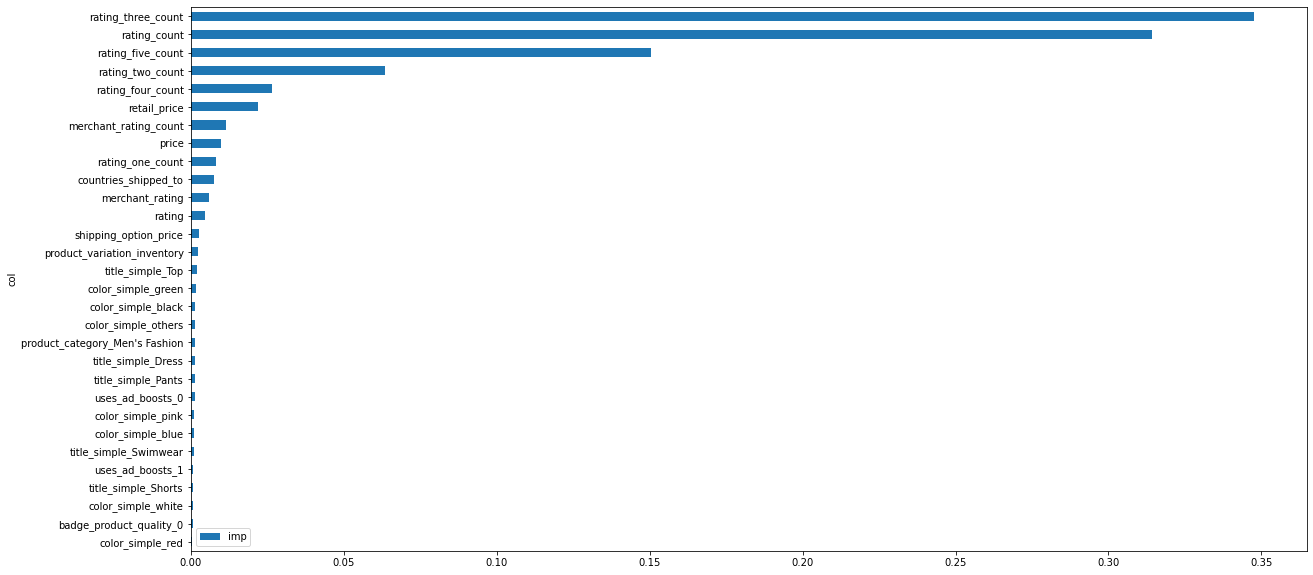

In [122]:
feature_importance(forest_model, X_train)

#### Hope this helps!
I am very new to machine learning so please comment and provide any feedback.